In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

## Data Explore and Analysis Visualization

In [9]:
df = pd.read_csv('bank.csv', sep=';')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df.shape


(4521, 17)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
#Mencari nilai unique pada data
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

 job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

 marital
['married' 'single' 'divorced']

 education
['primary' 'secondary' 'tertiary' 'unknown']

 default
['no' 'yes']

 balance
[ 1787  4789  1350 ...  -333 -3313  1137]

 housing
['no' 'yes']

 loan
['no' 'yes']

 contact
['cellular' 'unknown' 'telephone']

 day
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

 month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

 duration
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  35

In [17]:
#Mengecek data duplikat
df.duplicated().sum()

0

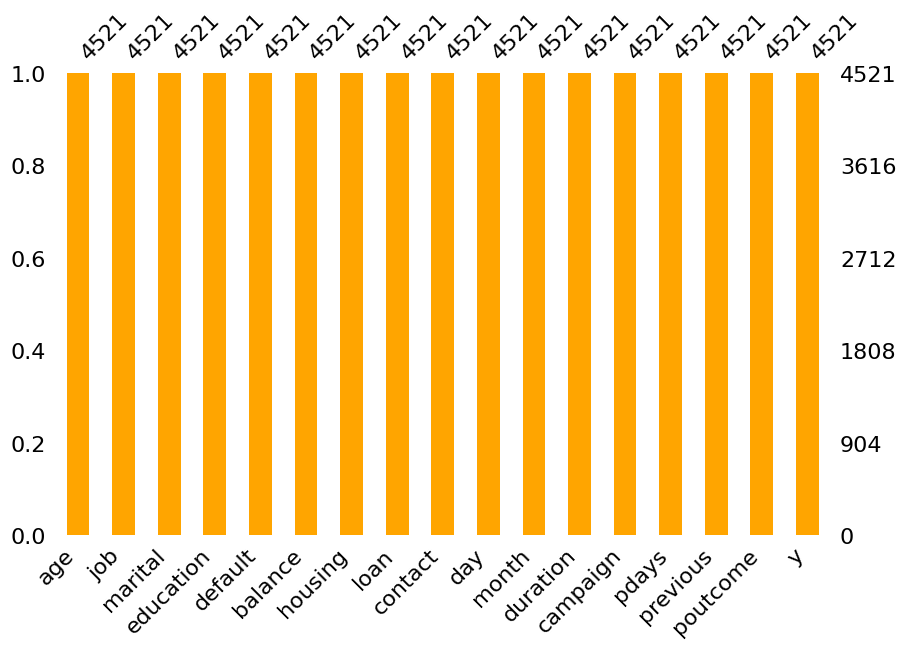

In [21]:
# cek missing values dengan visualisasi menggunakan library: Missingno adalah pustaka khusus untuk menampilkan missing value dalam bentuk barchart

import missingno as msno
msno.bar(df,figsize=(10,6),color='orange')
plt.show()

Text(0, 0.5, 'Frequency')

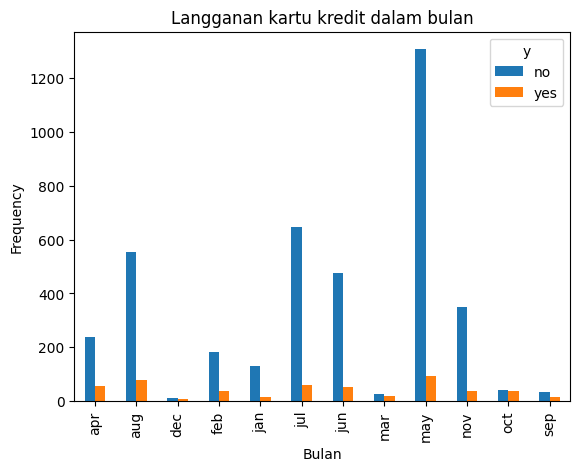

In [23]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Langganan kartu kredit dalam bulan')
plt.xlabel('Bulan')
plt.ylabel('Frequency')

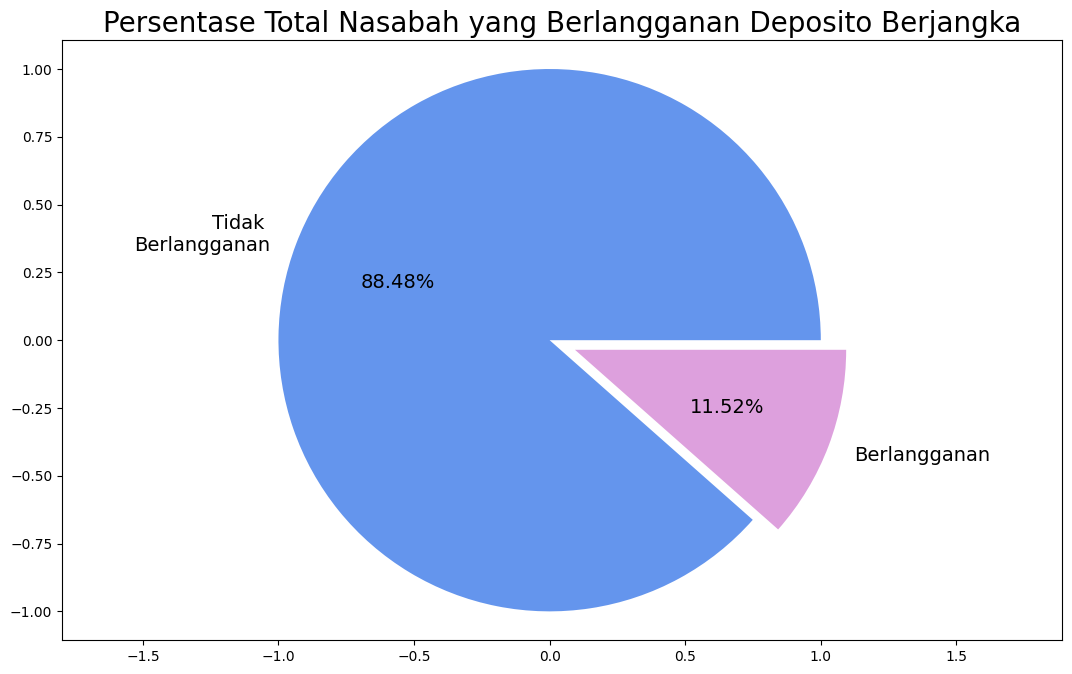

In [29]:
# Membuat pie chart untuk nasabah yang berlangganan deposito berjangka
mylabels = ["Tidak \nBerlangganan", "Berlangganan"]
mycolors = ["cornflowerblue", "plum"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = mylabels,
       colors = mycolors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

## Preprocessing data

In [30]:
df['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [32]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data = df.join(cat_list)
    df = data

cat_vars = ['job','marital','education','default','housing','loan','contact','month', 'poutcome']
data_vars = df.columns.values.tolist()
prep = [i for i in data_vars if i not in cat_vars]

In [33]:
final = df[prep]

In [34]:
X = final.loc[:, final.columns != 'y']
y = final.loc[:, final.columns == 'y']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic Regression

In [37]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

c:\Users\dikid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dikid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
log_reg.score(X_test, y_test)

0.8761974944731025

In [45]:
matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(matrix_log_reg)

[[1153   37]
 [ 131   36]]


In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


## K-Nearest Neighbors

In [42]:
#Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=50)

# Train model menggunakan training set
knn.fit(X_train, y_train)

# Memprediksi respon/output
y_pred1 = knn.predict(X_test)

c:\Users\dikid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[1180   10]
 [ 151   16]]


In [44]:
#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8813559322033898


## Support Vector Machine

In [46]:
sclf = svm.SVC()

sclf.fit(X_train, y_train)

y_pred_svm = sclf.predict(X_test)

c:\Users\dikid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
sclf.score(X_test, y_test)

0.8769344141488578

In [48]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(matrix_svm)

[[1190    0]
 [ 167    0]]


In [49]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(sclf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.88


## Decision Tree 

In [50]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# Predict the response for test dataset
y_pred3 = dtc.predict(X_test)

In [51]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[1140   50]
 [  94   73]]


In [52]:
#Akurasi dari Decision Tree
print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.8938835666912307


## Random Forest 

In [53]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

C:\Users\dikid\AppData\Local\Temp\ipykernel_21904\3056969685.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [54]:
clf.score(X_test, y_test)

0.8865143699336773

In [55]:
matrix_clf = confusion_matrix(y_test, y_pred_clf)
print(matrix_clf)

[[1162   28]
 [ 126   41]]


In [56]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.89


## Naive Bayes

In [57]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred5 = gnb.predict(X_test)

c:\Users\dikid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[1040  150]
 [  83   84]]


In [59]:
#Akurasi dari Naive Bayes
print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.8282977155490051


## All Models classifier Evaluation

In [61]:
print('Accuracy of logistic regression : {:.2f}'.format(log_reg.score(X_test, y_test)))
print('Accuracy of KNN : {:.2f}'.format(knn.score(X_test, y_test)))
print('Accuracy of decision tree : {:.2f}'.format(dtc.score(X_test, y_test)))
print('Accuracy of random forest : {:.2f}'.format(clf.score(X_test, y_test)))
print('Accuracy of naive bayes : {:.2f}'.format(gnb.score(X_test, y_test)))
print('Accuracy of SVM : {:.2f}'.format(sclf.score(X_test, y_test)))

Accuracy of logistic regression : 0.88
Accuracy of KNN : 0.88
Accuracy of decision tree : 0.89
Accuracy of random forest : 0.89
Accuracy of naive bayes : 0.83
Accuracy of SVM : 0.88


## Conclusion

Dari data hasil analisa diatas didapatkan 2 algoritma dengan akurasi tertinggi yaitu 'decision tree' dan 'random forest', dikarenakan  untuk memprediksi data berupa nasabah bank dengan dibutuhkannya akurasi tinggi maka 2 algoritma tersebut sangat cocok untuk digunakan dalam data diatas